# [SWCON253] Machine Learning
#### Instructor: Eunseop Shin (kairos9603@khu.ac.kr)
##### Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

P2.A: SVM을 이용하여 선형 분류 (4점)

### 학습목표
SVM 모델을 이용하여 선형 분류 가능한 데이터를 분류하는 분류기를 학습 할 수 있다.
Scikit-Learn을 이용하여 모델 학습, 검증 과정을 구현할 수 있다.
실습내용
Scikit-Learn의 SVM을 이용하여 선형 분류가 가능한 데이터셋을 분류하는 분류기를 학습해봅니다.

실습은 다음 순서로 진행됩니다.

1) 주어진 데이터셋 loading
2) SVM 모델 구현, 학습 <직접 구현>
3) SVM 모델 검증 <직접 구현>
4) Decision Boundary 시각화 <직접 구현>
5) Discussion
이번 실습에서 여러분은 2), 3), 4) 부분의 코드를 직접 작성합니다.

앞으로 대부분의 실습도 위와 같은 순서로 진행됩니다. 이번 실습을 통해 각 부분의 코드를 이해하고 다음 실습에 참고하도록합니다.

#### 점수
#### SVM 모델 작성: 4점
#### .ipynb 파일과 함께 .html 파일 (File -> export as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.

## Imports

In [9]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading the Dataset
코드를 실행시켜 실습코드와 같이 첨부된 dataset.csv파일을 로드합니다.

In [16]:
# CSV 파일을 읽기
X, y = [], []

with open('./dataset.csv', 'r') as f:
    next(f)
    for line in f:
        line = line.strip()
        if line:
            values = line.split(',')
        else:
            continue
        X.append([float(i) for i in values[:2]])
        y.append(int(values[-1]))

print(len(X), len(y))

X = np.array(X)
y = np.array(y)

100 100


## Dataset Split & Visualization
Load 된 데이터셋을 모델 학습과 검증을 위해 Trainset과 Testset으로 랜덤 샘플링하여 나누고 데이터셋이 어떤 분포로 생겼는지 시각화하여 살펴봅니다.

In [17]:
import random


# 랜덤시드 설정
random.seed(123)

# 데이터 랜덤 셔플
idx = list(range(len(X)))
random.shuffle(idx)

# 앞 80개 까지는 학습용으로 뒤 20개는 테스트용으로 split
X_train = [X[i] for i in idx[:80]]
y_train = [y[i] for i in idx[:80]]
X_test = [X[i] for i in idx[80:]]
y_test = [y[i] for i in idx[80:]]

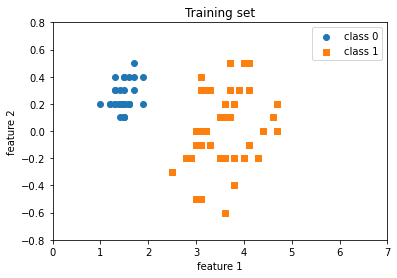

In [18]:
# 클래스 별로 데이터를 시각화 하여 분포를 살펴보기
plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 0],
            label='class 0', marker='o')

plt.scatter([i[0] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            [i[1] for idx, i in enumerate(X_train) if y_train[idx] == 1],
            label='class 1', marker='s')

plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([0.0, 7])
plt.ylim([-0.8, 0.8])
plt.legend()
plt.show()

## 2)SVM 모델 구현, 학습

이 부분에서는 Scikit-Learn의 SVC모듈의 linear 커널을 이용하여 선형 SVM모델을 선언하고 학습합니다.

여기서 사용하는 SVC 클래스는 C-Support Vector Classification으로 SVM을 사용한 분류기 모델입니다.

SVC class에서는 kernel 파라미터를 이용하여 사용하는 커널의 형태를 변경할 수 있습니다. 이번 실습에서는 'linear'(선형) 커널을 사용한 선형 SVM을 이용합니다.

아래 # <your code> 부분을 채워 넣어서 코드를 직접 구현하세요.

세부 구현 사항: kernel은 'linear'

In [19]:
svm = SVC(kernel='linear')
########### <your code> training with train dataset
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [20]:
# Train dataset에서 성능 검증
train_acc = sum(svm.predict(X_train) == y_train) / len(y_train) ########## <your code> predict train dataset with svm
print('Train set accuracy: %.2f%%' % (train_acc*100))
# Test dataset에서 성능 검증
test_acc = sum(svm.predict(X_test) == y_test) / len(y_test) ########## <your code> predict train dataset with svm
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 100.00%
Test set accuracy: 100.00%


train 데이터셋과 test 데이터셋 각각을 이용하여 2개의 scatter plot을 그리고 그 위에 학습된 가중치를 이용하여 결정경계를 시각화합니다.

In [23]:
### 데이터셋에서 Decision Boundary 시각화
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# Decision Boundary를 표시하기 위해
# x1_min부터 x1_max까지 0.02간격으로, x2_min부터 x2_max까지 0.02간격의 모든 점의 좌표를 반환
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))
Z = svm.predict()############ <your code> predict all datapoint from mashgrid
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3) # 범위를 색으로 표시

# 그래프로 표현
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == 1],
            [i[1] for idx, i in enumerate(X) if y[idx] == 1],
            label='class 0', marker='x')
plt.scatter([i[0] for idx, i in enumerate(X) if y[idx] == -1],
            [i[1] for idx, i in enumerate(X) if y[idx] == -1],
            label='class 1', marker='s')
## testset 강조
plt.scatter([i[0] for idx, i in enumerate(X_test)],
            [i[1] for idx, i in enumerate(X_test)],
            label='class 0', facecolors='none', edgecolor='black', s=100, marker='o')

# 그래프로 표현
plt.title('Dataset')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'xx2'